In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

In [32]:
REBUILD_DATA = True  # set to true to run once, then back to false unless you want to change something in your training data.

class cardCollecting():
    IMG_SIZE = 128
    numToCard = {0: 'ace of clubs', 1: 'ace of diamonds', 2: 'ace of hearts', 3: 'ace of spades', 4: 'eight of clubs', 5: 'eight of diamonds', 6: 'eight of hearts', 7: 'eight of spades', 8: 'five of clubs', 9: 'five of diamonds', 10: 'five of hearts', 11: 'five of spades', 12: 'four of clubs', 13: 'four of diamonds', 14: 'four of hearts', 15: 'four of spades', 16: 'jack of clubs', 17: 'jack of diamonds', 18: 'jack of hearts', 19: 'jack of spades', 20: 'joker', 21: 'king of clubs', 22: 'king of diamonds', 23: 'king of hearts', 24: 'king of spades', 25: 'nine of clubs', 26: 'nine of diamonds', 27: 'nine of hearts', 28: 'nine of spades', 29: 'queen of clubs', 30: 'queen of diamonds', 31: 'queen of hearts', 32: 'queen of spades', 33: 'seven of clubs', 34: 'seven of diamonds', 35: 'seven of hearts', 36: 'seven of spades', 37: 'six of clubs', 38: 'six of diamonds', 39: 'six of hearts', 40: 'six of spades', 41: 'ten of clubs', 42: 'ten of diamonds', 43: 'ten of hearts', 44: 'ten of spades', 45: 'three of clubs', 46: 'three of diamonds', 47: 'three of hearts', 48: 'three of spades', 49: 'two of clubs', 50: 'two of diamonds', 51: 'two of hearts', 52: 'two of spades'}
    training_data = []
    test_data = []
    validate_data = []
    
    def make_training_data(self):
        for i in range(53):
            for f in tqdm(os.listdir('dataset\\train\\' + self.numToCard[i])):
                if "jpg" in f:
                    try:
                        path = os.path.join('dataset\\train\\' + self.numToCard[i], f)
                        img = cv2.imread(path, cv2.IMREAD_COLOR)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.training_data.append([np.array(img), i])

                    except Exception as e:
                        print(label, f, str(e))
                        break

        np.random.shuffle(self.training_data)

        # Split images and labels into separate arrays
        images = np.array([i[0] for i in self.training_data], dtype=np.float32).reshape(-1, self.IMG_SIZE, self.IMG_SIZE, 3)
        labels = np.array([i[1] for i in self.training_data], dtype=np.float32)

        # Save the arrays
        np.save("training_images.npy", images)
        np.save("training_labels.npy", labels)

    def make_test_data(self):
        for i in range(53):
            for f in tqdm(os.listdir('dataset\\test\\' + self.numToCard[i])):
                if "jpg" in f:
                    try:
                        path = os.path.join('dataset\\test\\' + self.numToCard[i], f)
                        img = cv2.imread(path, cv2.IMREAD_COLOR)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.test_data.append([np.array(img), i])

                    except Exception as e:
                        print(label, f, str(e))
                        break

        np.random.shuffle(self.test_data)

        # Split images and labels into separate arrays
        images = np.array([i[0] for i in self.test_data], dtype=np.float32).reshape(-1, self.IMG_SIZE, self.IMG_SIZE, 3)
        labels = np.array([i[1] for i in self.test_data], dtype=np.float32)

        # Save the arrays
        np.save("test_images.npy", images)
        np.save("test_labels.npy", labels)
        
    def make_validate_data(self):
        for i in range(53):
            for f in tqdm(os.listdir('dataset\\valid\\' + self.numToCard[i])):
                if "jpg" in f:
                    try:
                        path = os.path.join('dataset\\valid\\' + self.numToCard[i], f)
                        img = cv2.imread(path, cv2.IMREAD_COLOR)
                        img = cv2.resize(img, (self.IMG_SIZE, self.IMG_SIZE))
                        self.validate_data.append([np.array(img), i])

                    except Exception as e:
                        print(label, f, str(e))
                        break

        np.random.shuffle(self.validate_data)

        # Split images and labels into separate arrays
        images = np.array([i[0] for i in self.validate_data], dtype=np.float32).reshape(-1, self.IMG_SIZE, self.IMG_SIZE, 3)
        labels = np.array([i[1] for i in self.validate_data], dtype=np.float32)

        # Save the arrays
        np.save("valid_images.npy", images)
        np.save("valid_labels.npy", labels)

if REBUILD_DATA:
    cardCollecting = cardCollecting()
    cardCollecting.make_training_data()
    cardCollecting.make_test_data()
    cardCollecting.make_validate_data()

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 621.91it/s]


In [33]:
training_images = np.load("training_images.npy")
training_labels = np.load("training_labels.npy")

test_images = np.load("test_images.npy")
test_labels = np.load("test_labels.npy")

valid_images = np.load("valid_images.npy")
valid_labels = np.load("valid_labels.npy")

In [12]:
print(len(training_images))
print(len(test_images))
print(len(valid_images))

7624
265
265


26.0


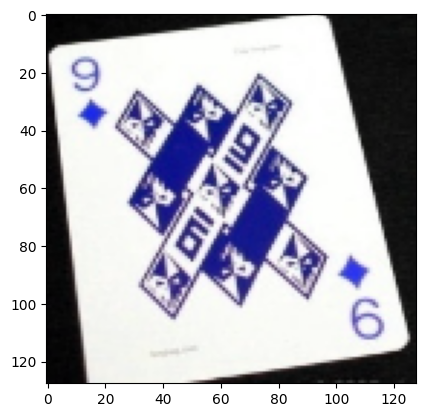

In [34]:
print(training_labels[3])
plt.imshow(training_images[3] / 255.0)
plt.show()

In [42]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 64, 3, padding=1)  # Using padding to keep spatial dimensions
        self.conv2 = nn.Conv2d(64, 128, 3, padding=1)
        self.conv3 = nn.Conv2d(128, 256, 3, padding=1)

        #Batch normalization after convolutional layers can stablize and speed up training
        self.bn1 = nn.BatchNorm2d(64)
        self.bn2 = nn.BatchNorm2d(128)
        self.bn3 = nn.BatchNorm2d(256)

        #Prevents overfitting by randomly dopping units during training
        self.dropout = nn.Dropout(0.3)

       # Dummy input to calculate the size of the fully connected layer
        x = torch.randn(1, 3, 128, 128)  # Adjust based on the image size
        self._to_linear = None
        self.convs(x)
        
        self.fc1 = nn.Linear(self._to_linear, 512)
        self.fc2 = nn.Linear(512, 53)

    def convs(self, x):
        x = F.max_pool2d(F.relu(self.bn1(self.conv1(x))), (2,2)) #Attemp with different activation functions
        x = F.max_pool2d(F.relu(self.bn2(self.conv2(x))), (2,2))
        x = F.max_pool2d(F.relu(self.bn3(self.conv3(x))), (2,2))

        if self._to_linear is None:
            self._to_linear = x.numel() // x.size(0)  # Number of features

        return x

    def forward(self, x):
        x = self.convs(x)
        x = x.reshape(x.size(0), -1)  # Flatten the tensor using reshape
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return F.softmax(x, dim=1)
        
net = Net()

In [36]:
import torch.optim as optim

# X = torch.Tensor(training_images).view(-1, 50, 50)
X = torch.Tensor(training_images).permute(0,3,1,2)
train_X = X/255.0
train_y = torch.LongTensor(training_labels)

test_X = (torch.Tensor(test_images).permute(0,3,1,2))/255.0
test_y = torch.LongTensor(test_labels)

val_X = (torch.Tensor(valid_images).permute(0,3,1,2))/255.0
val_y = torch.LongTensor(valid_labels)

print(len(train_X))
print(len(test_X))
print(len(val_X))

7624
265
265


In [37]:
if torch.cuda.is_available():
    device = torch.device("cuda:0")
    print("running on gpu")
else:
    device = torch.device("cpu")
    print("running on cpu")

running on gpu


In [43]:
from torch.utils.data import DataLoader, TensorDataset

def train(net, train_X, train_y, val_X, val_y, device):
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    loss_function = nn.CrossEntropyLoss()
    
    BATCH_SIZE = 100
    EPOCHS = 8
    net.to(device)  # Move model to device

    # Using DataLoader for efficient data handling
    train_dataset = TensorDataset(train_X, train_y)
    train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

    val_X, val_y = val_X.to(device), val_y.to(device)  # Move validation data to device once

    for epoch in range(EPOCHS):
        net.train()  # Set model to training mode
        epoch_loss = 0

        for batch_X, batch_y in tqdm(train_loader):  # Iterate through DataLoader
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    
            optimizer.zero_grad()
    
            outputs = net(batch_X)
            loss = loss_function(outputs, batch_y)
            loss.backward()
            
            # Optional: Gradient Clipping
            torch.nn.utils.clip_grad_norm_(net.parameters(), max_norm=1.0)

            optimizer.step()
            
            epoch_loss += loss.item() * batch_X.size(0)  # Accumulate loss

        # Print average loss for the epoch
        avg_epoch_loss = epoch_loss / len(train_loader.dataset)
        print(f"Epoch: {epoch + 1}. Loss: {avg_epoch_loss:.4f}")
        
        # Validate the model in mini-batches
        net.eval()  # Set model to evaluation mode
        val_loss = 0
        with torch.no_grad():
            for i in range(0, len(val_X), BATCH_SIZE):
                val_batch_X = val_X[i:i+BATCH_SIZE]
                val_batch_y = val_y[i:i+BATCH_SIZE]
                
                val_outputs = net(val_batch_X)
                batch_val_loss = loss_function(val_outputs, val_batch_y)
                val_loss += batch_val_loss.item() * val_batch_X.size(0)

        avg_val_loss = val_loss / len(val_X)
        print(f"Validation Loss: {avg_val_loss:.4f}")

# Assuming you have train_X, train_y, val_X, val_y, and device defined
train(net, train_X, train_y, val_X, val_y, device)


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:56<00:00,  1.35it/s]


Epoch: 1. Loss: 3.9727
Validation Loss: 3.9795


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:57<00:00,  1.35it/s]


Epoch: 2. Loss: 3.9706
Validation Loss: 3.9682


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:57<00:00,  1.34it/s]


Epoch: 3. Loss: 3.9687
Validation Loss: 3.9682


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:57<00:00,  1.35it/s]


Epoch: 4. Loss: 3.9660
Validation Loss: 3.9720


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:57<00:00,  1.34it/s]


Epoch: 5. Loss: 3.9679
Validation Loss: 3.9758


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:57<00:00,  1.35it/s]


Epoch: 6. Loss: 3.9668
Validation Loss: 3.9758


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:57<00:00,  1.35it/s]


Epoch: 7. Loss: 3.9661
Validation Loss: 3.9758


100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:57<00:00,  1.35it/s]


Epoch: 8. Loss: 3.9683
Validation Loss: 3.9871


In [44]:
def test(net, test_X, test_y, device, batch_size=32):
    net.to(device)
    net.eval()  # Set model to evaluation mode

    correct = 0
    total = 0

    # Create DataLoader for test data
    test_dataset = torch.utils.data.TensorDataset(test_X, test_y)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    with torch.no_grad():
        for batch_X, batch_y in tqdm(test_loader):
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)
            
            outputs = net(batch_X)
            _, predicted = torch.max(outputs, 1)  # Get the predicted class

            print(predicted)
            print(batch_y)
            print("_____________________")

            correct += (predicted == batch_y).sum().item()  # Directly compare with batch_y
            total += batch_y.size(0)

    print("Accuracy: ", round(correct / total, 3))

# Example call to the test function
# Ensure test_X, test_y, and device are properly defined
test(net, test_X, test_y, device)



 44%|█████████████████████████████████████▎                                              | 4/9 [00:00<00:00, 10.69it/s]

tensor([48, 48, 48, 48, 48, 48, 19, 19, 48, 48, 48, 48, 19, 48, 48, 48, 19, 19,
        48, 48, 48, 19, 19, 48, 48, 19, 48, 48, 48, 19, 48, 48],
       device='cuda:0')
tensor([ 7, 31, 43, 48, 47, 50, 21, 16, 18, 28, 27, 14, 32,  5, 22, 50, 15, 51,
         3, 40, 32,  2, 10, 17,  2, 50, 47, 36, 11, 29, 39, 11],
       device='cuda:0')
_____________________
tensor([48, 48, 48, 48, 19, 19, 48, 48, 48, 48, 48, 48, 48, 19, 48, 48, 19, 19,
        48, 48, 19, 48, 19, 48, 48, 48, 19, 48, 19, 48, 48, 19],
       device='cuda:0')
tensor([28, 38,  1, 15, 34, 39, 43, 32,  0,  9, 29, 18, 36,  8,  8, 39, 41,  3,
        27, 29, 27, 29, 33,  1,  0,  4, 31, 36, 47, 13, 40, 27],
       device='cuda:0')
_____________________
tensor([48, 19, 19, 19, 19, 19, 48, 48, 48, 48, 48, 48, 19, 48, 48, 19, 48, 48,
        19, 48, 48, 48, 19, 19, 48, 48, 48, 48, 48, 48, 19, 19],
       device='cuda:0')
tensor([35, 14, 31,  7, 28, 42, 19,  6, 38, 24, 30, 37,  3, 20, 26, 48,  2,  5,
        47, 17, 51,  6, 27, 41,

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00, 15.01it/s]

tensor([48, 19, 48, 48, 48, 48, 19, 48, 48, 48, 48, 19, 19, 48, 19, 19, 48, 48,
        48, 48, 48, 19, 48, 48, 19, 48, 48, 48, 19, 19, 19, 48],
       device='cuda:0')
tensor([ 2, 38, 10, 24, 30, 37,  3, 24, 52, 28,  8, 22, 52, 41, 23, 19, 18, 44,
        30, 39, 47, 42, 20, 12,  6, 41, 46, 40,  2,  4, 17, 32],
       device='cuda:0')
_____________________
tensor([48, 48, 48, 48, 48, 19, 48, 48, 48], device='cuda:0')
tensor([52, 13, 12, 52, 42, 17, 25,  0,  9], device='cuda:0')
_____________________
Accuracy:  0.026


In [41]:
def print_sample_predictions(net, test_X, test_y, device, num_samples=10):
    net.to(device)
    net.eval()
    with torch.no_grad():
        # Take a sample from the test set
        sample_X = test_X[:num_samples].to(device)
        sample_y = test_y[:num_samples].to(device)
        
        outputs = net(sample_X)
        _, predictions = torch.max(outputs, 1)
        
        for i in range(num_samples):
            print(f"Sample {i}:")
            print(f"Predicted: {predictions[i].item()}, Actual: {torch.argmax(sample_y[i]).item()}")

print_sample_predictions(net, test_X, test_y, device)

Sample 0:
Predicted: 3, Actual: 0
Sample 1:
Predicted: 3, Actual: 0
Sample 2:
Predicted: 42, Actual: 0
Sample 3:
Predicted: 3, Actual: 0
Sample 4:
Predicted: 42, Actual: 0
Sample 5:
Predicted: 42, Actual: 0
Sample 6:
Predicted: 3, Actual: 0
Sample 7:
Predicted: 3, Actual: 0
Sample 8:
Predicted: 3, Actual: 0
Sample 9:
Predicted: 3, Actual: 0


In [45]:
torch.save(net.state_dict(), 'model.pth')